**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 10: Filtrado en el espacio
```

# INTEGRANTES

1. ALDANA CARRANZA, JUAN JOSE

2. VEREAU FLORES, OSCAR EMILIO

### 1. Implemente un algoritmo que permita realizar la correlacion 2D de una imagen de MxN con una mascara de mxn
* El algoritmo debe retornar una imagen de las mismas dimensiones que la imagen de entrada, recuerde que el "padding" usualmente se hace con ceros, no obstante se puede duplicar filas o columnas del borde, o hacerlo mediante un espejo sobre el borde.*

* El algoritmo tambien puede obtener la solución sin necesidad del "padding", agregando varias condicionales que permitan solo ponderar con los datos coincidentes.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def filtro_espacial(imagen, filtro):
    M, N = imagen.shape
    m, n = filtro.shape

    filas_add = (m - 1) // 2
    columnas_add = (n - 1) // 2

    img_pad = np.zeros((M + m - 1, N + n - 1), dtype=np.float32)
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add + N] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]
            multiplicacion = vecindad * filtro
            resultado[i-filas_add, j-columnas_add] = np.sum(multiplicacion)

    return resultado

### 1. ¿Por qué es importante usar *padding* al aplicar filtros espaciales?

Cuando aplicamos un filtro en una imagen (como suavizado o detección de bordes), el cálculo de cada píxel depende de sus vecinos. El problema aparece en los bordes, porque ahí **no hay suficientes píxeles alrededor** para aplicar el filtro.

El *padding* sirve para **agregar filas y columnas extra** alrededor de la imagen, evitando perder información o reducir el tamaño.

**En resumen:**
- Permite procesar los bordes de la imagen.
- Evita que la imagen se haga más pequeña después del filtrado.
- Reduce errores o distorsiones en los bordes.

---

### 2. ¿Qué es un kernel (o máscara) y cómo influye su tamaño?

Un **kernel** es una **pequeña matriz** (por ejemplo 3×3 o 5×5) que se “desliza” por la imagen.  
En cada posición se multiplican los valores del kernel por los píxeles que cubre y luego se suman. Ese resultado reemplaza el valor del píxel central.

**Influencia del tamaño:**
- **Kernel pequeño (3×3):** cambios más suaves, se conserva más detalle.
- **Kernel grande (7×7 o más):** efecto más fuerte, pero puede **desdibujar** la imagen.

**En resumen:**  
El kernel define **cómo se modifica la imagen**, y su tamaño determina **qué tan amplio** será el cambio (más pequeño = detalle, más grande = suavizado fuerte).


In [3]:
img = np.arange(100).reshape(10,10)
filtro = np.round(np.ones((5,7))/35, 3)

print(img)
print(filtro)

img_filtrada = filtro_espacial(img, filtro)
print("resultado \n", img_filtrada)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]]
resultado 
 [[ 4  5  6  7  8  9  9  8  7  6]
 [ 7  9 12 14 15 16 17 14 12 10]
 [12 15 19 23 24 25 26 23 19 15]
 [18 23 28 33 34 35 36 31 26 21]
 [24 30 36 43 44 45 46 40 34 27]
 [29 37 45 53 54 55 56 49 41 33]
 [35 44 54 63 64 65 66 57 48 39]
 [41 52 63 74 75 76 77 66 55 44]
 [35 44 53 63 64 64 65 56 47 38]
 [28 35 43 50 51 51 52 45 37 30]]


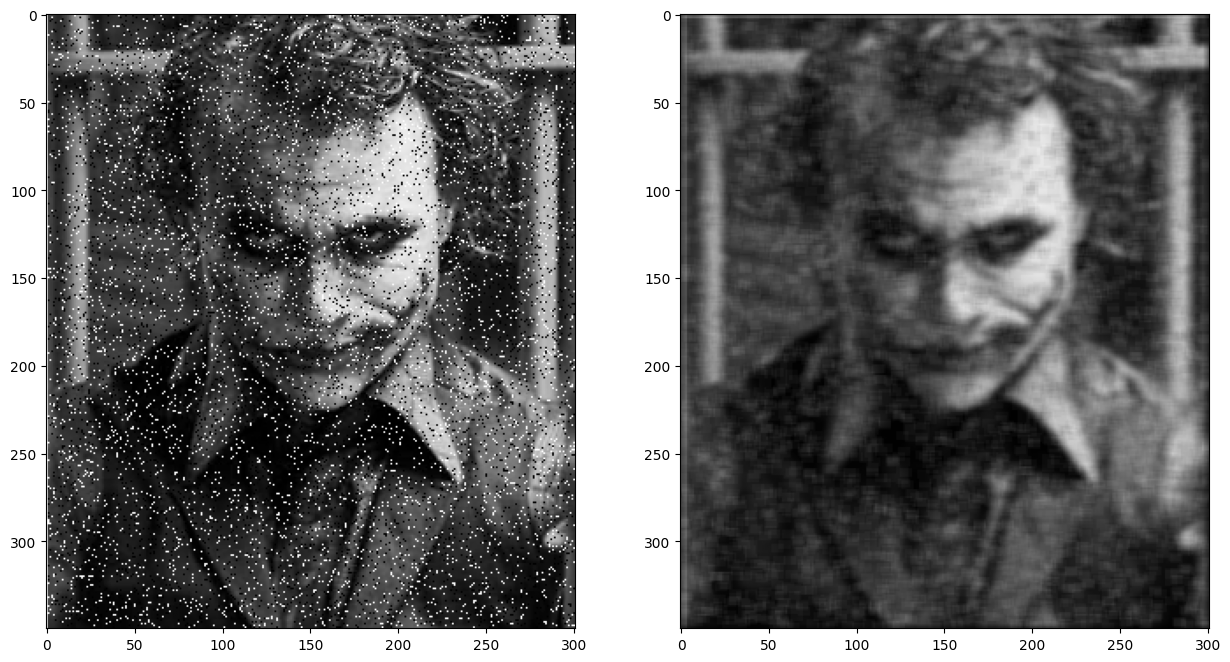

In [4]:
img_ruido = cv2.imread('lab_images/ruido.png', 0)/255

filtro = np.ones((5,7))
filtro = filtro/np.sum(filtro)

img_ruido_filtrada = filtro_espacial(img_ruido, filtro)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_ruido, cmap='gray')
plt.subplot(122)
plt.imshow(img_ruido_filtrada, cmap='gray', vmin=0, vmax=1)
plt.show()

### 2.- Implemente un algoritmo que permita mejorar solo los pixeles oscuros y de bajo contraste
*Puede modificar levemente el algoritmo realizado en el enunciado **1** para lograr el objetivo*

In [5]:
def filtro_espacial_estadistico(imagen, selem = np.ones((3,3))):
    media_global = np.mean(imagen)
    desv_global = np.std(imagen)
    print("Media global:", media_global*0.3)
    print("Desviacion global:", desv_global)

    M, N = imagen.shape
    m, n = selem.shape

    filas_add = (m - 1) // 2
    columnas_add = (n - 1) // 2

    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            media_local = np.mean(multiplicacion)
            desv_local = np.std(multiplicacion)

            if (media_local<media_global) and (desv_local<0.8*desv_global) and (desv_local>0.2*desv_global):
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]*3
            else:
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]

    return resultado

### 1. Objetivo del algoritmo y tipo de imágenes que se benefician

El objetivo del algoritmo es **resaltar detalles locales** de la imagen comparando cada zona (vecindad) con las estadísticas globales.  
Si una región tiene valores de media y desviación dentro de ciertos rangos, se **intensifica** el píxel multiplicándolo por 3, logrando un **realce selectivo**.

Este filtro se usa especialmente en:
- Imágenes con **bajo contraste**.
- Imágenes donde se quieren destacar **texturas o patrones finos**.
- Imágenes **médicas**, **industriales** o **satélite**, donde los detalles pequeños importan.

---

### 2. Vecindad y Kernel: importancia de `selem`

En el código, la **vecindad** es el bloque de píxeles que rodea al píxel central.  
Esta vecindad se define según el tamaño y forma de la matriz:
selem = np.ones((3,3))


### 3. ¿Qué efecto tiene el factor de escala de 1.5 en los píxeles mejorados y cómo podría ajustarse para obtener diferentes resultados?

El factor de escala (como el 1.5, o en este código el 3) se encarga de **incrementar la intensidad del píxel** cuando la vecindad cumple las condiciones estadísticas definidas.  
Esto significa que el píxel se vuelve **más brillante** y se resalta frente al resto de la imagen.

Si el factor es **mayor**, el realce es **más fuerte** y los detalles resaltados se vuelven más notorios, pero también puede aparecer **ruido o saturación** en zonas muy claras.  
Si el factor es **menor**, el realce será **más suave**, manteniendo un aspecto más natural pero con menor contraste.

Para modificar este comportamiento, simplemente se cambia el número por el que se multiplica el píxel:

```python
resultado[i-filas_add, j-columnas_add] = img_pad[i,j] * factor


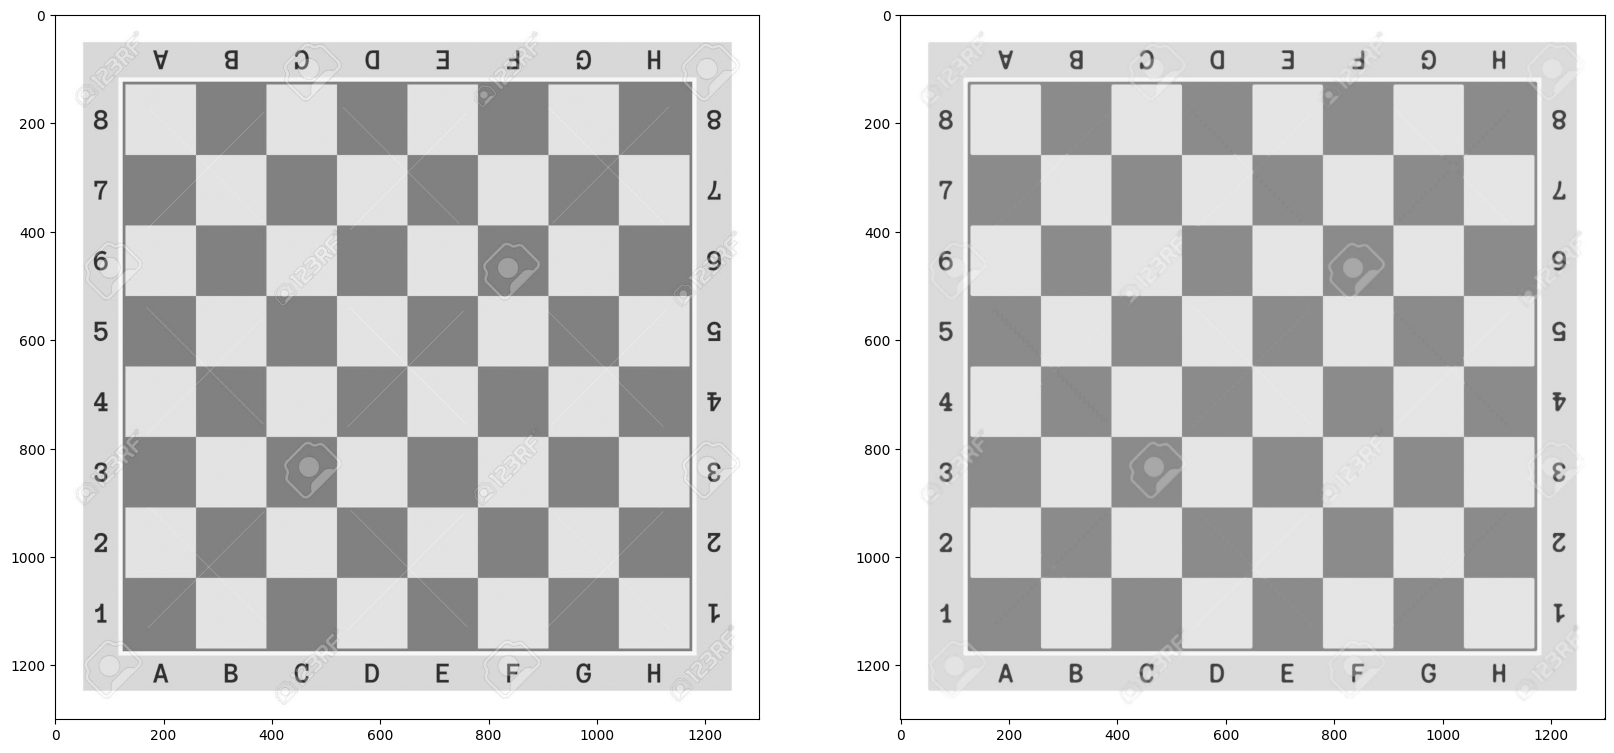

In [21]:
emma = np.uint16(cv2.imread('./lab_images/ajedrez.jpg', 0))
emma_filtrada = filtro_espacial_estadistico(emma, selem = np.ones((5,5)))
plt.subplots(1,2, figsize=(20,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray', vmin=0, vmax=255)
plt.show()

### 3.- Implemente los filtros estadisticos min, max, moda y mediana


In [22]:
from scipy.stats import mode

def filtro_espacial_estadistico(imagen, selem = np.ones((3,3)), filter_type='median'):
    M, N = imagen.shape
    m, n = selem.shape

    filas_add = (m - 1) // 2
    columnas_add = (n - 1) // 2

#     img_pad = np.zeros((M+ filas_adicionales*2, N + columnas_adicionales*2))
    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            if filter_type =='min':
                resultado[i-filas_add, j-columnas_add] = np.min(multiplicacion)
            elif filter_type == 'max':
                resultado[i-filas_add, j-columnas_add] = np.max(multiplicacion)
            elif filter_type == 'median':
                resultado[i-filas_add, j-columnas_add] = np.median(multiplicacion)
            elif filter_type == 'mode':
                resultado[i-filas_add, j-columnas_add] = mode(multiplicacion, axis=None, keepdims=False).mode

    return resultado

### 1. ¿Qué es un filtro estadístico en el procesamiento de imágenes y cómo se aplica en el código mostrado?

Un **filtro estadístico** es un tipo de filtro que modifica el valor de cada píxel en función de una **medida estadística calculada sobre su vecindad**.  
En lugar de usar operaciones lineales como la convolución, estos filtros aplican funciones como **min**, **max**, **mediana** o **moda** dentro de una ventana (kernel) alrededor de cada píxel.

En el código mostrado, el filtro trabaja así:
1. Se define una **vecindad** mediante la matriz `selem`, generalmente de tamaño 3×3.
2. Se recorre la imagen pixel por pixel, extrayendo la vecindad en cada posición.
3. Según el parámetro `filter_type`, se aplica uno de los siguientes cálculos estadísticos:
   - `min(vecindad)`
   - `max(vecindad)`
   - `median(vecindad)`
   - `mode(vecindad)`
4. El resultado reemplaza al valor original del píxel.

De esta forma, el filtro **no transforma toda la imagen de manera global**, sino que ajusta cada píxel **según sus vecinos inmediatos**.

---

### 2. Diferencias entre los filtros Min, Max, Median y Mode y cuándo usarlos

| Filtro | Qué hace | Cuándo usarlo | Efecto visual |
|-------|----------|---------------|---------------|
| **Min** | Reemplaza el píxel por el **valor mínimo** de su vecindad | Para eliminar **ruido blanco** (puntos brillantes) | La imagen se oscurece ligeramente y se suavizan los puntos blancos |
| **Max** | Reemplaza el píxel por el **valor máximo** de su vecindad | Para eliminar **ruido negro** (puntos oscuros) | La imagen se aclara y desaparecen puntos negros aislados |
| **Median** | Reemplaza el píxel por el **valor medio ordenado** de la vecindad | Ideal para **eliminar ruido sal y pimienta sin perder bordes** | Suaviza la imagen manteniendo los bordes definidos |
| **Mode** | Reemplaza el píxel por el **valor más frecuente** en la vecindad | Útil para **imágenes segmentadas o categóricas** (mapas, máscaras) | Produce regiones más uniformes, reduce variaciones pequeñas |

**Resumen práctico:**
- Usa **Min** si la imagen tiene puntos blancos molestos.
- Usa **Max** si la imagen presenta puntos negros aislados.
- Usa **Median** si quieres limpiar ruido sin dañar detalles ni bordes (es el más usado en fotos reales).
- Usa **Mode** cuando trabajes con **etiquetas, máscaras o clases**, no con fotos en niveles de gris.

---


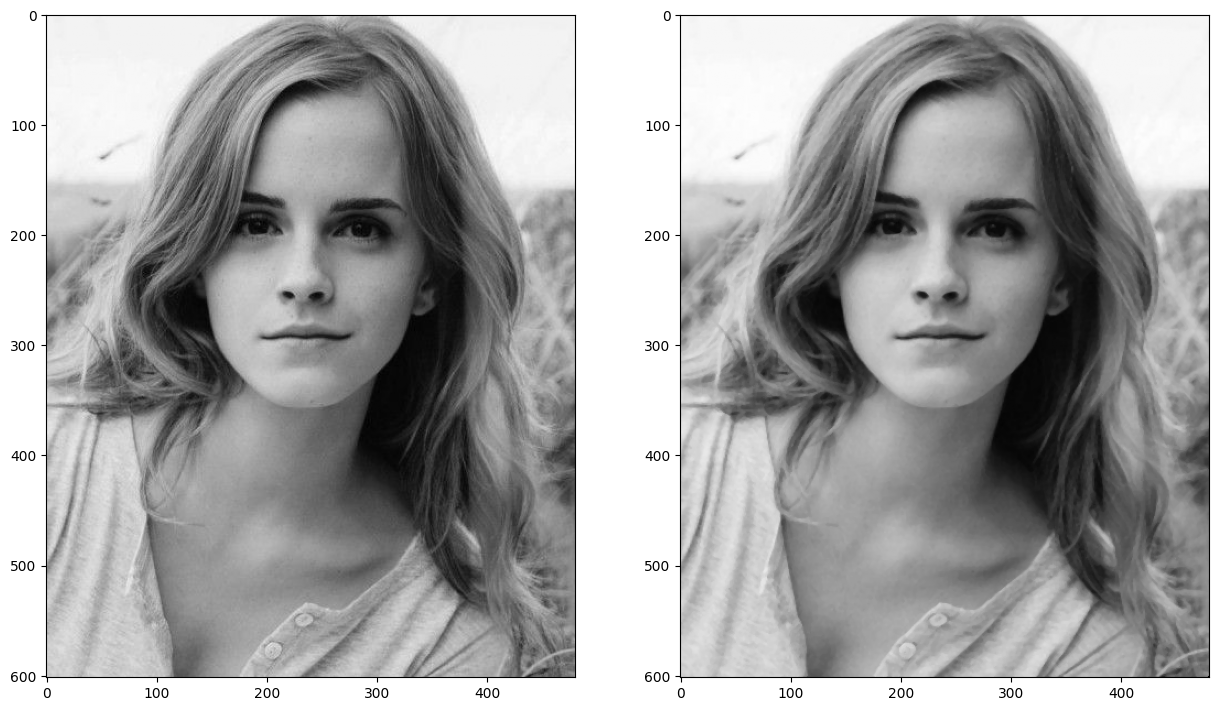

In [23]:
#MINIMO
emma = np.uint16(cv2.imread('./lab_images/emma.jpg', 0))
emma_filtrada = filtro_espacial_estadistico(emma)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

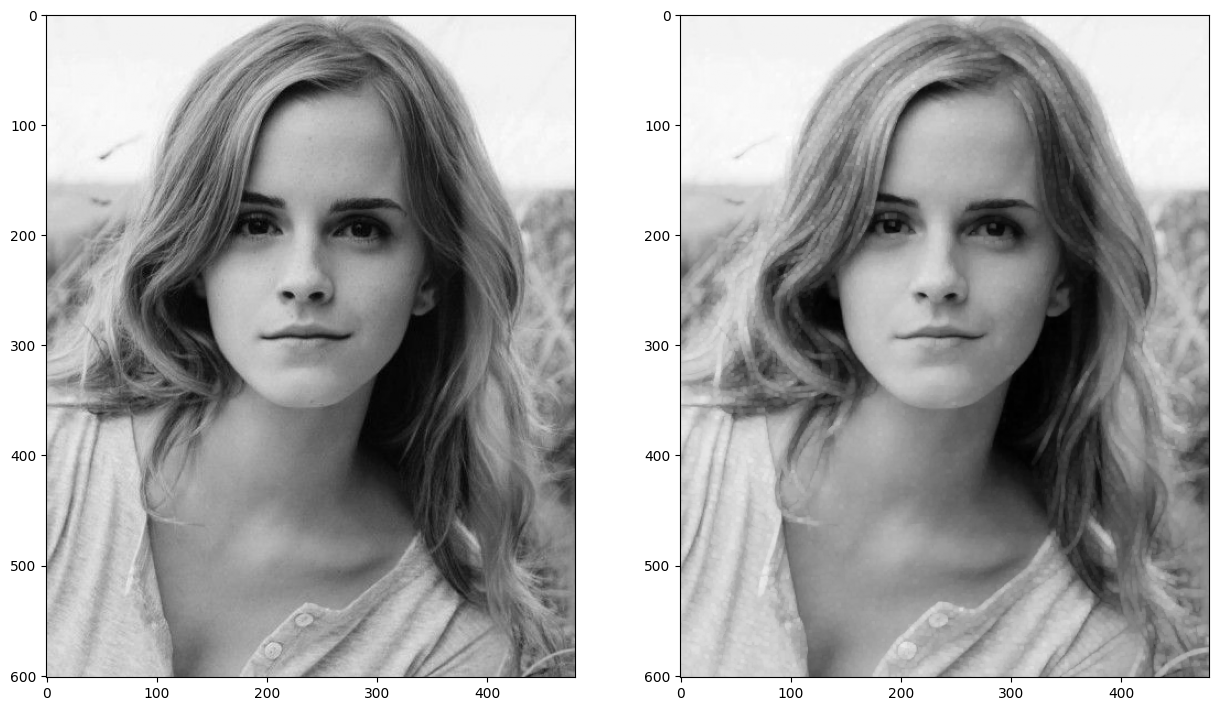

In [24]:
#MAX
emma = np.uint16(cv2.imread('./lab_images/emma.jpg',0))
emma_filtrada = filtro_espacial_estadistico(emma, filter_type='max')
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

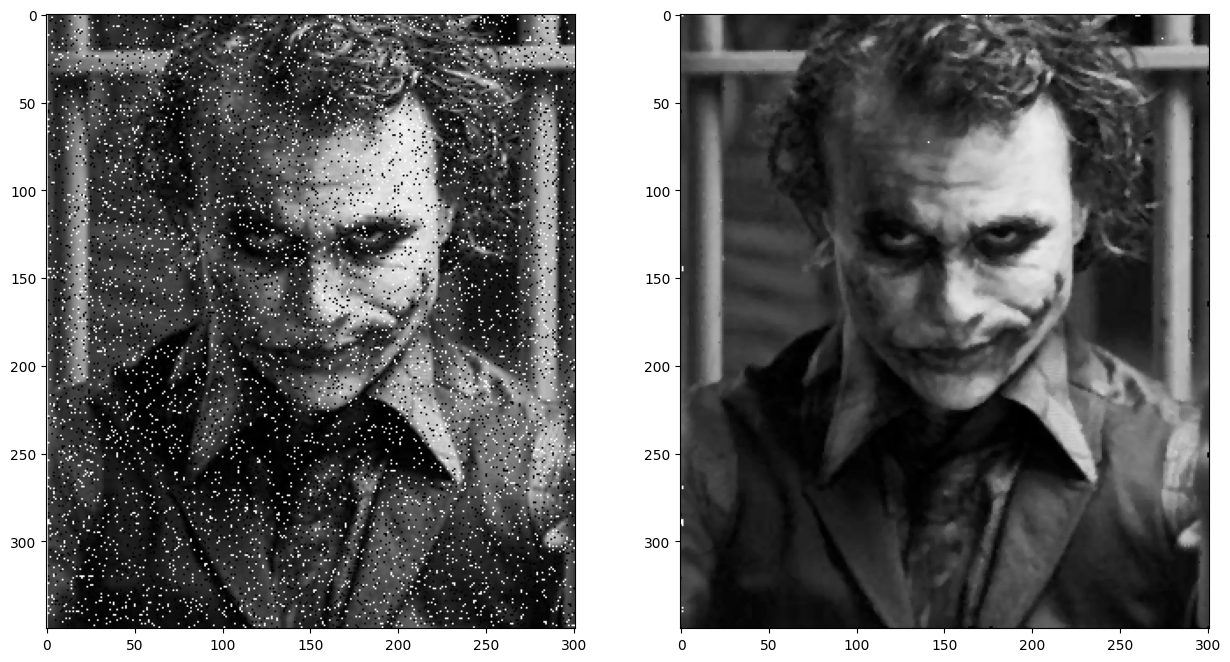

In [25]:
#MEDIANA
emma = np.uint16(cv2.imread('./lab_images/ruido.png', 0))
emma_filtrada = filtro_espacial_estadistico(emma)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

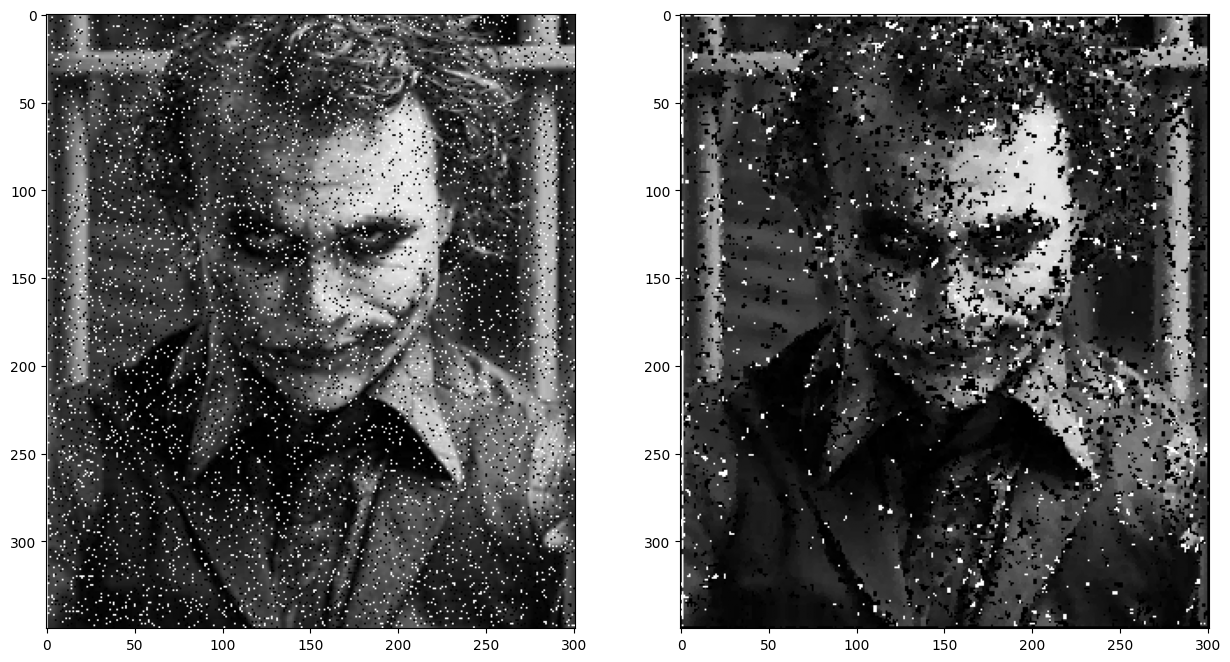

In [26]:
#MODA
emma = np.uint16(cv2.imread('./lab_images/ruido.png', 0))
emma_filtrada = filtro_espacial_estadistico(emma, filter_type='mode')
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

### 4.- Implemente los filtros espaciales de suavizado y nitidez explicados en clase

Utilizando la funcion **convolve2d(img, kernel, mode= "same")** de **scipy.signal** y los kernels: 
(tambien se puede usar **correlate2d**)
* Promedio
* Gaussiano
* Laplaciano


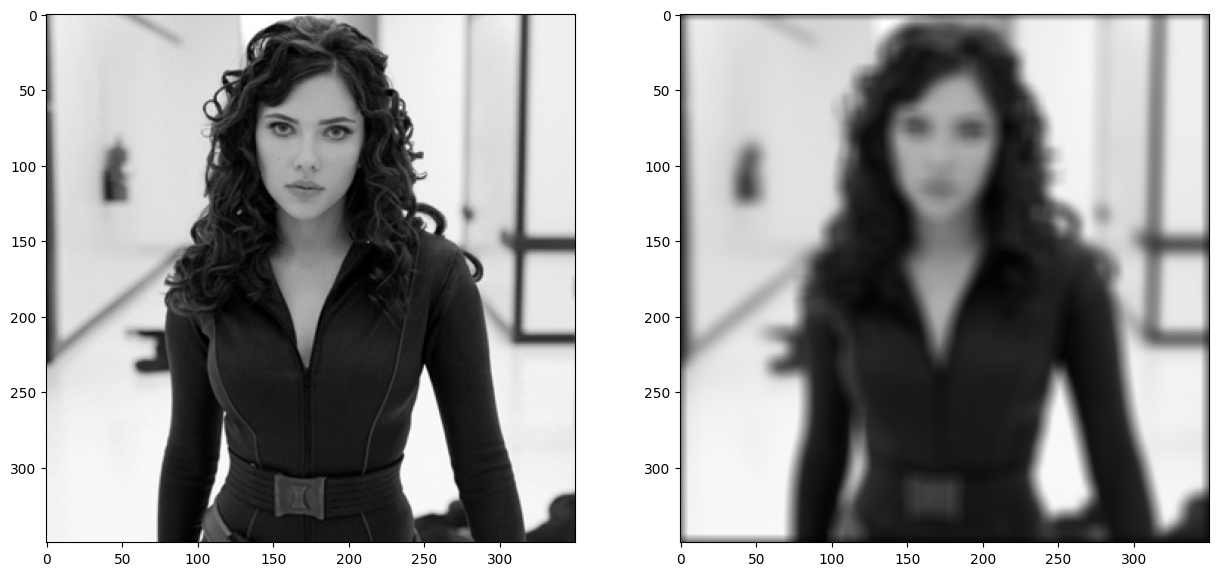

In [27]:
#PROMEDIO
from scipy import signal

img = cv2.imread("./lab_images/scarlett_oc.png", 0)/255
kernel = np.ones((11,11))/121

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

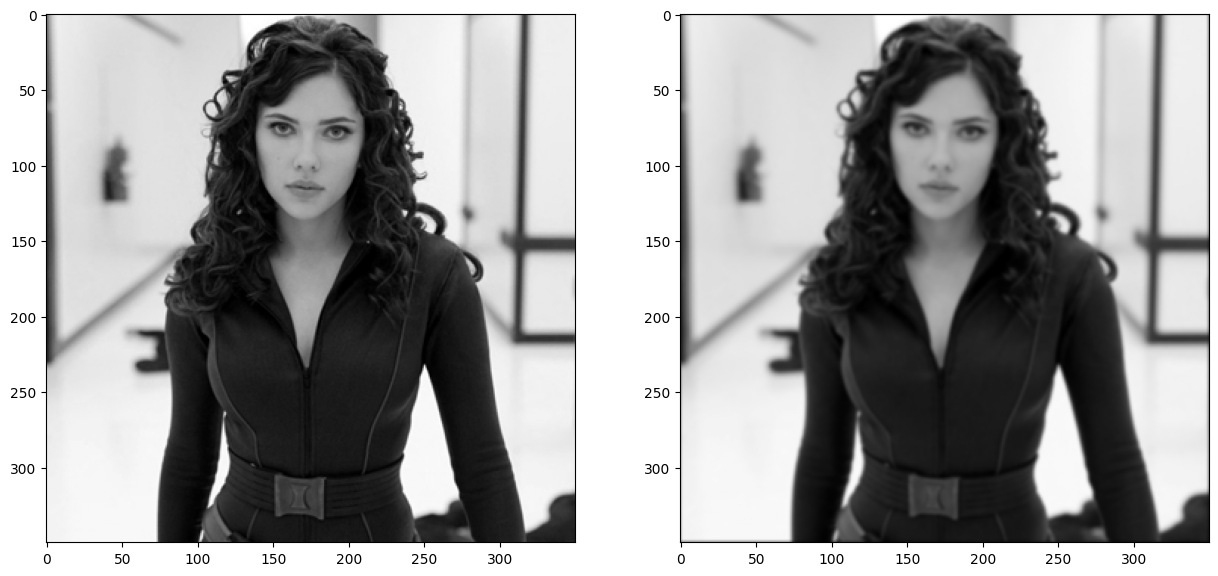

In [28]:
#PROMEDIO
from scipy import signal

img = cv2.imread("./lab_images/scarlett_oc.png", 0)/255
# kernel = np.array([[1,2,1], [2,4,2], [1,2,1]])/16
kernel = np.array([1,4,7,4,1])*np.array([[1],[4],[7],[4],[1]])
kernel = kernel/np.sum(kernel)

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

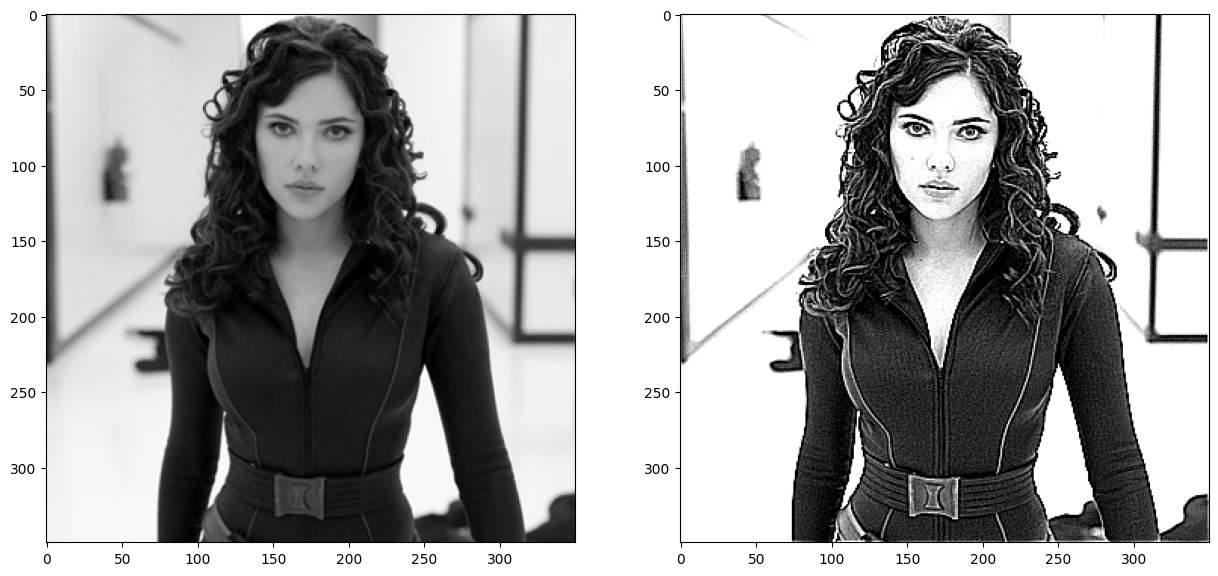

In [29]:
#LAPLACIANO
from scipy import signal
A = 1.5
img = cv2.imread("./lab_images/scarlett_oc.png", 0)/255
kernel = np.array([[-1,-1,-1], [-1,A+8,-1], [-1,-1,-1]])

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

**Utilizando OpenCV:**
* cv2.blur(img, (Tamaño_kernel))
* cv2.GaussianBlur(img,(Tamaño_kernel),desviacion_estandar)
* cv2.medianBlur(img,Tamaño_kernel)
* cv2.bilateralFilter(img,tamaño_kernel,sigmacolor,sigmaspace)  [Mas info](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html)

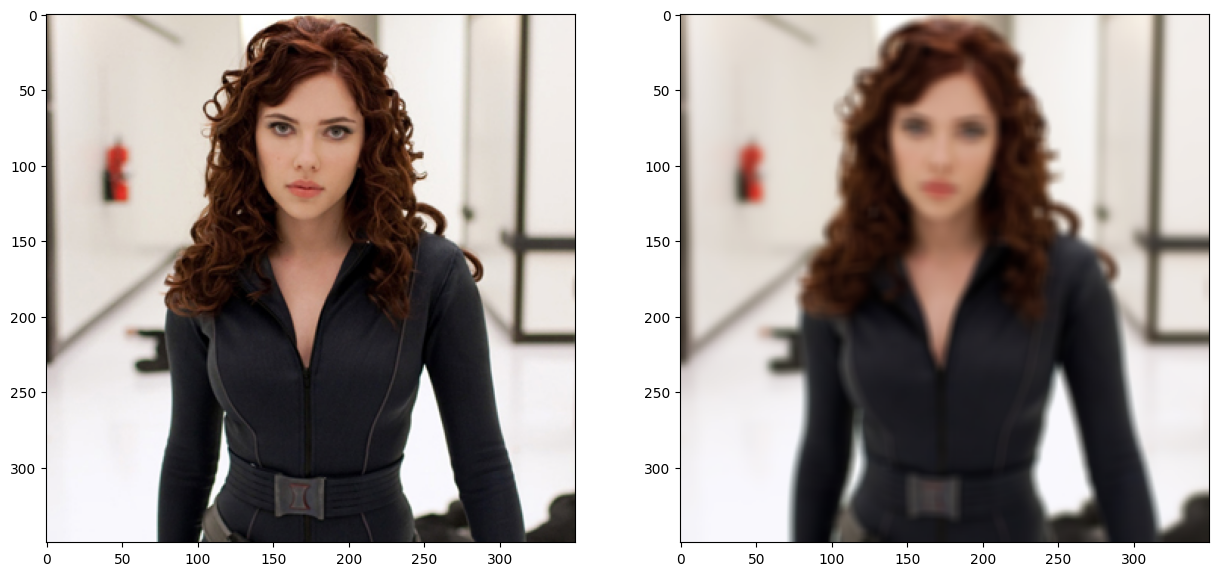

In [30]:
img = cv2.imread("./lab_images/scarlett_oc.png")[..., ::-1]

out = cv2.blur(img, (7,7))

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

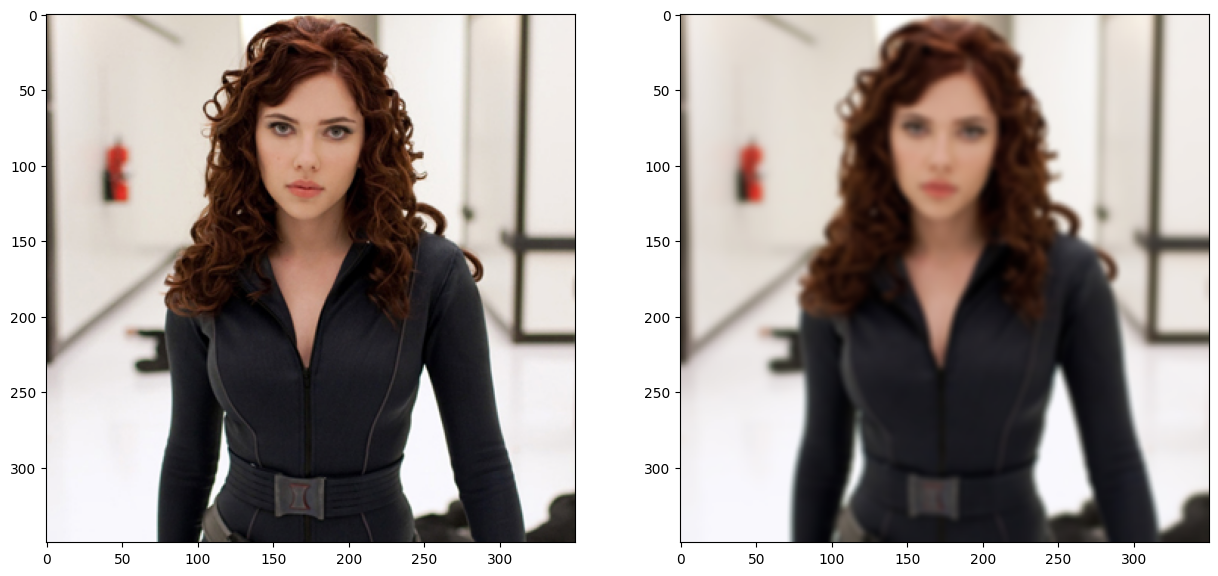

In [31]:
out = cv2.GaussianBlur(img,(7,7), 2)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

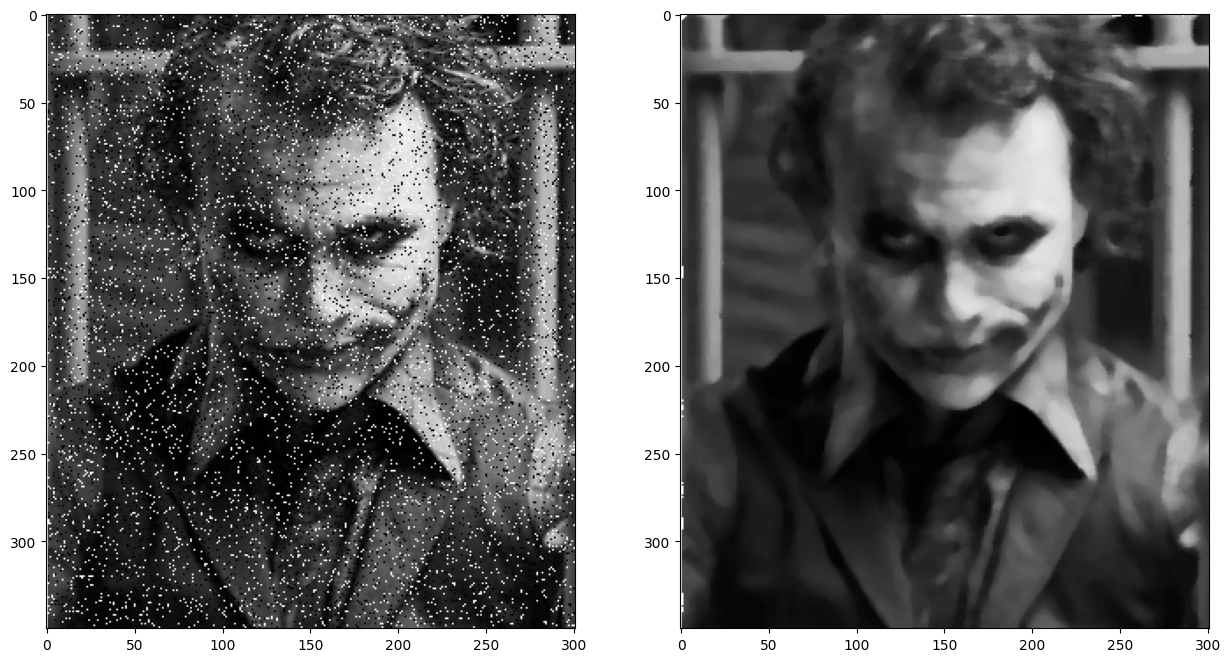

In [32]:
img_joker = cv2.imread('./lab_images/ruido.png')[..., ::-1]

img_joker_filtrada = cv2.medianBlur(img_joker, 7)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_joker, cmap='gray')
plt.subplot(122)
plt.imshow(img_joker_filtrada, cmap='gray')
plt.show()

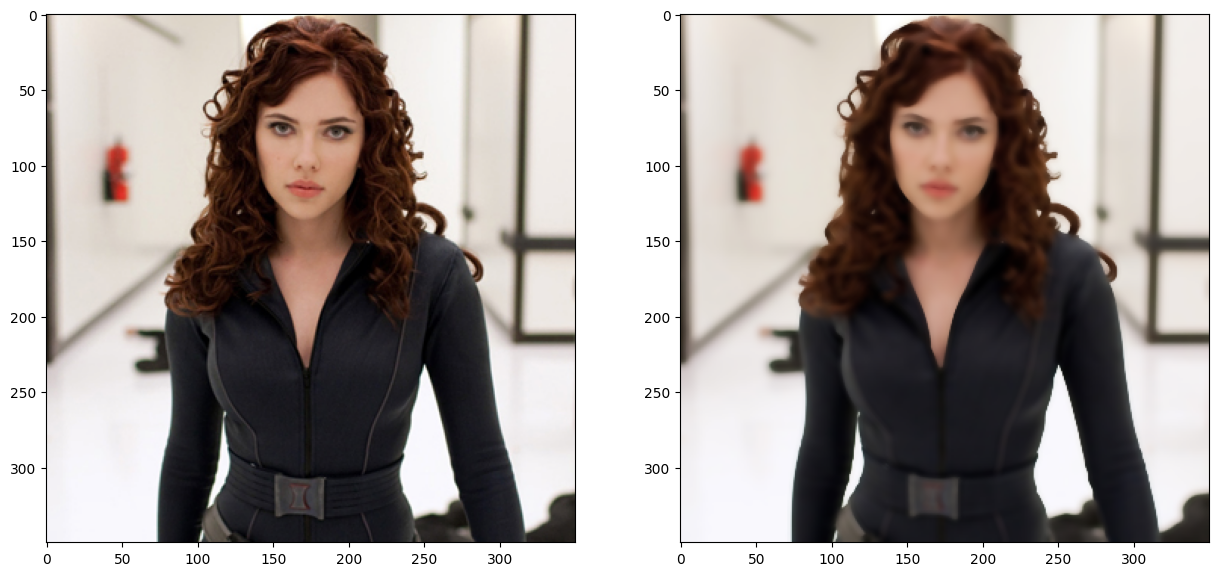

In [33]:
out = cv2.bilateralFilter(img,7, 160, 160)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

## 1. Diferencia entre filtros de suavizado y filtros de nitidez
Los filtros de **suavizado** (como el filtro de promedio y el filtro Gaussiano) se usan para reducir el ruido y suavizar la imagen, disminuyendo las variaciones entre píxeles vecinos. Su objetivo es hacer la imagen más uniforme.

Por otro lado, los filtros de **nitidez** (como el Laplaciano) resaltan los bordes y detalles, aumentando los cambios bruscos de intensidad. Estos filtros realzan contornos y texturas en la imagen.

---

## 2. Diferencias entre el filtro de promedio y el filtro Gaussiano
- **Filtro de promedio:** Calcula el promedio simple de los valores de los píxeles vecinos. Suaviza la imagen, pero puede generar un efecto borroso y perder detalles importantes.
- **Filtro Gaussiano:** Suaviza la imagen asignando mayor peso a los píxeles más cercanos al centro del kernel. Esto produce un suavizado más natural y conserva mejor los bordes que el filtro de promedio.

---

## 3. Propiedades del kernel Laplaciano y su efecto en la imagen
El kernel Laplaciano es un operador basado en la segunda derivada, lo cual permite detectar cambios bruscos en la intensidad. Normalmente tiene un valor positivo en el centro y valores negativos alrededor (o viceversa), lo que resalta los bordes.

Al aplicarlo:
- La imagen se vuelve más **nítida**.
- Se destacan los contornos.
- Puede hacer que el **ruido** también se vuelva más visible.

---

## 4. Significado de `mode="same"` en convolve2d
El parámetro `mode="same"` en la función `convolve2d` indica que la imagen resultante tendrá el **mismo tamaño** que la imagen original.

Esto se logra aplicando un **padding automático** en los bordes, evitando que la convolución reduzca el tamaño de la imagen durante el filtrado.

---


### 5.- Implemente un algoritmo para muestre el uso de la mascara de desenfoque (unsharp mask) y el filtro de altoaumento (Highboost)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5527010804321724..0.7063625450180081].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47162865146058397..1.702681072428972].


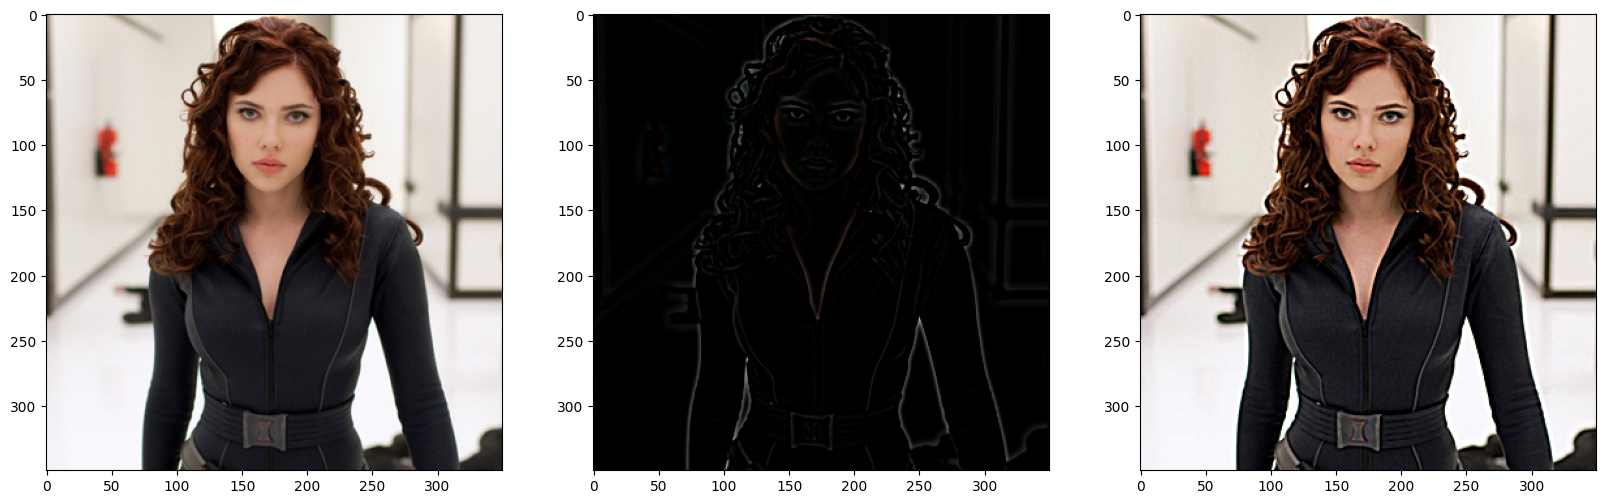

In [34]:
img = cv2.imread("./lab_images/scarlett_oc.png")[..., ::-1]/255

blur = cv2.blur(img, (7,7))

mask = img - blur

unsharp_image = mask + img

plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.subplot(132)
plt.imshow(mask, cmap="gray")
plt.subplot(133)
plt.imshow(unsharp_image, cmap='gray', vmin=0, vmax=1)
plt.show()

## 1. Funcionamiento de la máscara de desenfoque (Unsharp Mask)

La máscara de desenfoque es un método para **realzar detalles y bordes** en una imagen. A pesar de su nombre, su objetivo no es desenfocar, sino **hacer que la imagen se vea más nítida**.

El proceso funciona en tres pasos:

1. **Suavizado de la imagen (Blur):**  
   Se aplica un filtro de suavizado (por ejemplo, Gaussiano) para obtener una versión borrosa de la imagen original.

2. **Obtención de los detalles (Imagen High-Pass):**  
   Se resta la imagen borrosa de la imagen original:  
   \[
   \text{Detalles} = \text{Imagen Original} - \text{Imagen Suavizada}
   \]

3. **Realce de los detalles:**  
   Los detalles obtenidos se **suman nuevamente** a la imagen original:  
   \[
   \text{Imagen Final} = \text{Imagen Original} + \text{Detalles}
   \]

**Rol del filtro de suavizado:**  
El filtro de suavizado actúa como una referencia para identificar qué partes de la imagen son bordes/detalles (cambios bruscos). Entre más fuerte sea el suavizado, más marcados serán los detalles que se recuperen y realcen después.

---

## 2. Diferencia entre el filtro Highboost y la máscara de desenfoque estándar

La máscara de desenfoque estándar suma los detalles una sola vez a la imagen original.  
El **filtro Highboost** es una extensión donde se controla **cuánto se realzan** esos detalles mediante un **factor de amplificación** \( A \):

Fórmula 1 (forma básica):
Imagen Highboost = A * Imagen_Original - Imagen_Suavizada

Fórmula 2 (forma equivalente):
Imagen Highboost = Imagen_Original + (A - 1) * (Imagen_Original - Imagen_Suavizada)


### Efecto del factor de amplificación \( A \):

| Valor de \( A \) | Efecto |
|-----------------|--------|
| \( A = 1 \) | No hay realce (la imagen queda igual). |
| \( 1 < A \le 2 \) | Realce suave, mejora ligera de bordes. |
| \( A > 2 \) | Realce fuerte, los bordes son más marcados. |
| \( A \) muy grande | La imagen puede verse **demasiado contrastada** o con artefactos. |

**En resumen:**
- La máscara de desenfoque realza bordes **una sola vez**.
- Highboost permite **controlar y aumentar** el nivel de realce según las necesidades.

---


### 6.- Implemente un algoritmo para mostrar la gradiente de una imagen
**Use las mascaras:**
* Roberts
* Prewit
* Sobel
* Scharr

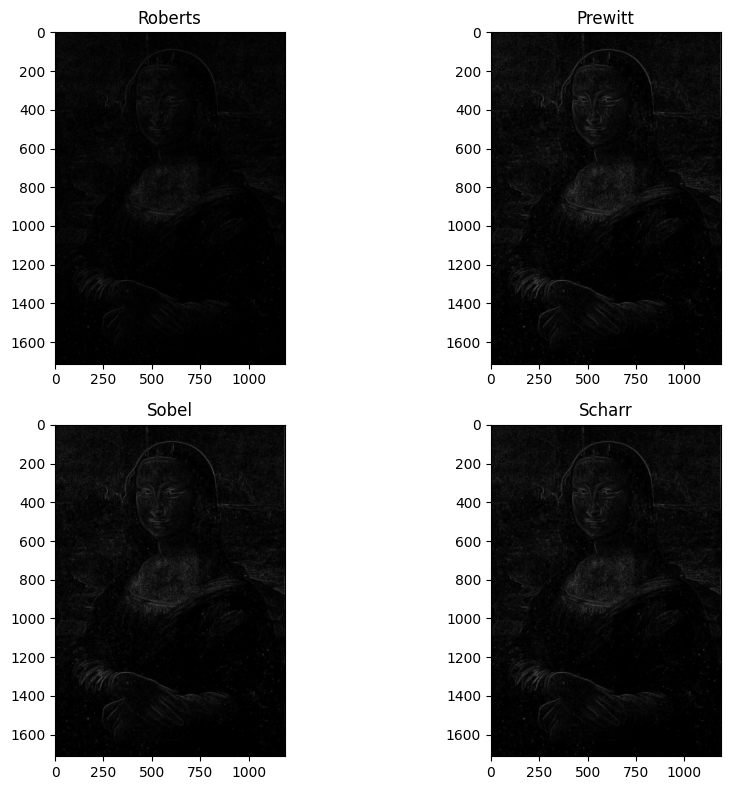

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Cargar imagen
img = cv2.imread("D:/PROCESAMIENTO DE SENALES/gioconda.jpg", 0) / 255

# === ROBERTS ===
kR_h = np.array([[0, -1],
                 [1,  0]])
kR_v = np.array([[-1, 0],
                 [0,  1]])

gR_h = signal.convolve2d(img, kR_h, mode="same")
gR_v = signal.convolve2d(img, kR_v, mode="same")
grad_R = np.sqrt(gR_h**2 + gR_v**2)

# === PREWITT ===
kP_h = np.array([[-1, -1, -1],
                 [ 0,  0,  0],
                 [ 1,  1,  1]])
kP_v = np.array([[-1, 0, 1],
                 [-1, 0, 1],
                 [-1, 0, 1]])

gP_h = signal.convolve2d(img, kP_h, mode="same")
gP_v = signal.convolve2d(img, kP_v, mode="same")
grad_P = np.sqrt(gP_h**2 + gP_v**2)

# === SOBEL ===
kS_h = np.array([[-1, -2, -1],
                 [ 0,  0,  0],
                 [ 1,  2,  1]])
kS_v = np.array([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]])

gS_h = signal.convolve2d(img, kS_h, mode="same")
gS_v = signal.convolve2d(img, kS_v, mode="same")
grad_S = np.sqrt(gS_h**2 + gS_v**2)

# === SCHARR ===
kSC_h = np.array([[-3, -10, -3],
                  [  0,   0,  0],
                  [  3,  10,  3]])
kSC_v = np.array([[-3, 0, 3],
                  [-10,0,10],
                  [-3, 0, 3]])

gSC_h = signal.convolve2d(img, kSC_h, mode="same")
gSC_v = signal.convolve2d(img, kSC_v, mode="same")
grad_SC = np.sqrt(gSC_h**2 + gSC_v**2)

# === PLOT ===
plt.figure(figsize=(10,8))
plt.subplot(221); plt.imshow(grad_R, cmap="gray"); plt.title("Roberts")
plt.subplot(222); plt.imshow(grad_P, cmap="gray"); plt.title("Prewitt")
plt.subplot(223); plt.imshow(grad_S, cmap="gray"); plt.title("Sobel")
plt.subplot(224); plt.imshow(grad_SC, cmap="gray"); plt.title("Scharr")
plt.tight_layout()
plt.show()


Luego de implementar las mascaras de gradientes

## 1. Característica distintiva de la máscara de Roberts y su precisión

La máscara de Roberts utiliza **kernels de 2×2** para calcular el gradiente, lo que significa que detecta cambios bruscos de intensidad considerando solo **vecinos inmediatos en diagonal**. Esto la hace útil para detectar bordes finos y detalles pequeños.

Sin embargo, su precisión puede ser menor porque:
- La ventana de cálculo es **muy pequeña (2×2)**.
- Es **muy sensible al ruido**, ya que no toma en cuenta un área mayor para suavizar la variación del brillo.
- No considera orientación horizontal/vertical de forma tan eficiente como otras máscaras más grandes.

**En resumen:** Roberts es rápida y simple, pero puede producir bordes más ruidosos y menos definidos en comparación con Sobel o Scharr.

---

## 2. Sobel vs Scharr en precisión y sensibilidad del borde

Las máscaras de Sobel y Scharr utilizan kernels de **3×3**, lo que permite tener una mejor estimación del gradiente al considerar un contexto mayor alrededor del píxel.

| Máscara | Características | Ventajas | Cuándo usar |
|--------|----------------|----------|-------------|
| **Sobel** | Enfatiza gradientes horizontales y verticales con pesos mayores en el centro. | Buen equilibrio entre suavizado y detección de bordes. | Aplicaciones generales donde se necesita un resultado estable. |
| **Scharr** | Es una versión mejorada de Sobel, optimizada para una **mejor aproximación del gradiente**. | Proporciona una delimitación de bordes **más precisa**, especialmente en ángulos inclinados. | Cuando se requiere **mayor exactitud** en la detección de bordes (procesamiento fino, visión artificial, alta calidad). |

**Conclusión:**  
- **Sobel** se usa cuando se quiere un resultado confiable y estable con bajo costo computacional.  
- **Scharr** se prefiere cuando se necesita **mayor precisión**, especialmente en bordes suaves o direcciones diagonales.
